# Problem
A $10.0 \text{ kg}$ object is launched vertically into the air with an initial velocity of $50 \text{ m/s}$. In addition to the force of gravity there is a frictional force which is proportional to velocity according to $f_y=-bv_y$.

1. Numerically generate distance-time graphs for the objects using $b=0$ but use several different step sizes for $\Delta t$, such as $1.0 \text{ s}$, $0.1 \text{ s}$, $0.01 \text{ s}$, and $0.001 \text{ s}$. Show the results on a simple graph. How does the highest point vary with the step size?

2. Numerically generate distance time graphs for the object, using a step size of $\Delta t= 0.01 \text{ s}$. Now, however, try non-zero values for $b$, such as $0.1$, $0.5$, $1$, $5$, and $10$. How does the highest point vary with $b$? What do you notice about the shape of the graph as $b$ increases?

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

We first create a generalized differential equation:
$$m\ddot{y}=-mg-b\dot{y} \implies \frac{d^2 y}{dt^2}=-g-\frac{b}{m}\frac{dy}{dt}$$
We nondimensionalize this differential equatoin by letting $y\equiv \xi y_c$, $t\equiv\tau t_c$, and $b\equiv B b_0$. This gives us:
$$\frac{y_c}{t_c^2} \frac{d^2\xi}{d\tau^2}=-g-B\frac{b_0y_c}{mt_c}\frac{d\xi}{d\tau} \implies \frac{d^2\xi}{d\tau^2}=-\frac{t_c^2 g}{y_c}-B\frac{b_0t_c}{m}\frac{d\xi}{d\tau}$$
If we define $t_c \equiv \frac{m}{b_0}$ and $y_c=t_c^2 g$, then we can rewrite this as:
$$\frac{d^2\xi}{d\tau^2}=-1-B\frac{d\xi}{d\tau}.$$
where all variables are dimensionless. We can implement below as `f(y)` where `y` is a generalized coordinate:

In [2]:
def f(t,y):
    fvector = np.zeros((2),float)
    fvector[0] = y[1]
    fvector[1] = -1-B*y[1]
    return fvector

In [ ]:
def f_dimensionalized(t,y)
    fvector = np.zeros((2),float)
    fvector[0] = y[1]
    fvector[1] = -g-b/m*y[1]
    return fvector

## Part 1
First, we solve this analytically. We essentially have a constant acceleration, thus:
$$y(t)=v_0t-\frac{1}{2}gt^2$$
and the highest point can be determined when $\frac{dy}{dt}=0$ (or via energy conservation) to get:
$$h=\frac{v^2}{2g}.$$
To solve it numerically, we use the Euler method to solve our differential equation:
$$\ddot{y}=-g$$

In [3]:
# Generalized Euler Function
def euler(t, h, N, y, f):
    kl = np.zeros(N)
    k1 = h*f(t,y)
    y = y + k1

    return y

Text(0.5, 1.0, 'Position vs Time')

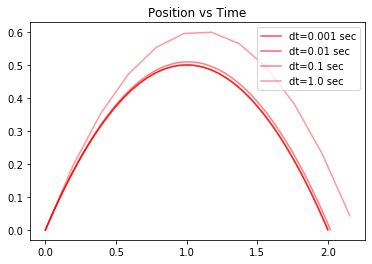

In [57]:
# Initialize
t_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((2),float) # General vector that describes position/velocity
B = 0

# List of dt steps
dt_list = [0.001,0.01,0.1,1]
dt_list = [i*0.196 for i in dt_list]
# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
for dt in dt_list:
    y[0] = 0; y[1] = 1; t = 0
    t_list = []; y_list = []
    while y[0] >= 0:
        t_list.append(t)
        y_list.append(y[0])

        y = euler(t,dt,2,y,f)

        t = t + dt
    lab = "dt=%s sec"% round(dt/0.196,3)
    alpha = (-np.log10(dt/0.196)+4)/10
    plt.plot(t_list,y_list,'r',label=lab,alpha=alpha)

plt.legend(loc='upper right')
plt.title('Position vs Time')

Notice that we multiplied each time step by $\frac{v_0}{g}$ here to reflect the original problem as best as possible, or else the time steps would not reflect the time steps in real life. But regardless, the smaller the step size, the smaller the maximum height. The reasoning behind this is that we are essentially doing a left Riemann sum, and since the velocity function is decreasing, we are overestimating the displacement.

Although not part of the original question, I would like to demonstrate the same problem using a different differential equation solver, the Runge-Kutta method.

In [40]:
# Generalized Runge Kutta Method
def rk4Algor(t, h, N, y, f):
    kl = np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(t,y)
    k2 = h*f(t+h/2.,y+k1/2.)
    k3 = h*f(t+h/2.,y+k2/2.)
    k4 = h*f(t+h,y+k3)
    y = y+(k1+2*(k2+k3)+k4)/6
    return y

Text(0.5, 1.0, 'Position vs Time')

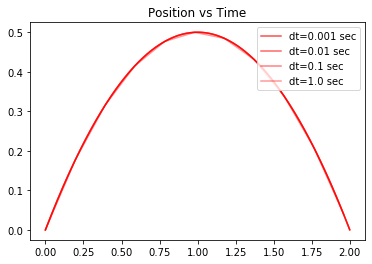

In [72]:
# Initialize
t_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((2),float) # General vector that describes position/velocity
B = 0

# List of dt steps
dt_list = [0.001,0.01,0.1,1]
dt_list = [i*0.196 for i in dt_list]
# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
for dt in dt_list:
    y[0] = 0; y[1] = 1; t = 0
    t_list = []; y_list=[]
    while y[0] >= 0:
        t_list.append(t)
        y_list.append(y[0])

        y = rk4Algor(t,dt,2,y,f)

        t = t + dt
    lab = "dt=%s sec"% round(dt/0.196,3)
    alpha = (-np.log10(dt/0.196)+4)/10
    plt.plot(t_list,y_list,'r',label=lab,alpha=alpha)

plt.legend(loc='upper right')
plt.title('Position vs Time')

We see that even at low time steps, the algorithm gives a near perfect approximation!

## Part 2
Again, we solve this analytically. The differential equation in question is:
$$\frac{dv_y}{dt}=-g-\frac{b}{m}v_y$$
Separating, we have:
$$\int_{v_0}^0 \frac{1}{g+\frac{b}{m}v_y} dv_y = -\int_0^t dt \implies \frac{m}{b}\ln\left(1+\frac{b}{mg}v_0\right)=t$$
Because our differential equation is essentially the same except with a nonzero $B$ value, we can easily implement this modification.

Text(0.5, 1.0, 'Position vs Time')

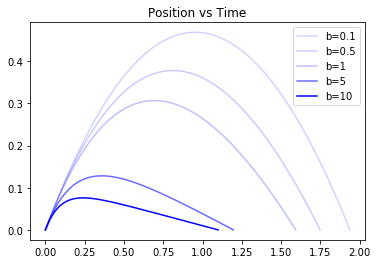

In [69]:
# Initialize
t_list = [] # Array with all the time stamps
y_list = [] # Array with all the positions
y = np.zeros((2),float) # General vector that describes position/velocity

# List of dt steps
B_list = [0.1,0.5,1,5,10]
dt = 0.001
# Initialize Graph
fig = plt.figure()
plt.subplot(111)

# Solve
for B in B_list:
    y[0] = 0; y[1] = 1; t = 0
    t_list = []; y_list = []
    while y[0] >= 0:
        t_list.append(t)
        y_list.append(y[0])

        y = rk4Algor(t,dt,2,y,f)

        t = t + dt
    lab = "b=%s"% round(B,3)
    alpha = (B+2)/12
    plt.plot(t_list,y_list,'b',label=lab,alpha=alpha)

plt.legend(loc='upper right')
plt.title('Position vs Time')

As $b$ increases, the curve becomes more and more eloganted, which is as expected.